# Measurement of 'Bestness': Neighborhood Traffic light Density

Notebook by Richard A. Wesh

## Metric:

This notebook looks at the number of trafic lights in each Pittsburgh neighborhood. The data used is obtained from from the Western PA Regional Data Center (https://data.wprdc.org/dataset/). The particular allowed us to gain information on both the number and type of lights throughout the neighboorhoods. This information in conjuction with graphs with the pandas and matplotlib allowed us to determine the bestness for the drag racing.

## Data:

The metric which we are looking at for bestness is which neighboorhood is the best for street racing. Traffic lights were selected as metric because a lower density of lights allows for more straight shot races with less crashes. Whether the lights are actuatted or fixed is important because fixed lights can be timed so that the race can be set such that red lights are less likely,and therfore crashes.All the neighboorhoods have had their number of lights passed into a pie chart to show the distribution percentages. The five with the least were then passed into a bar chart comparing fixed versus actuated lights. 

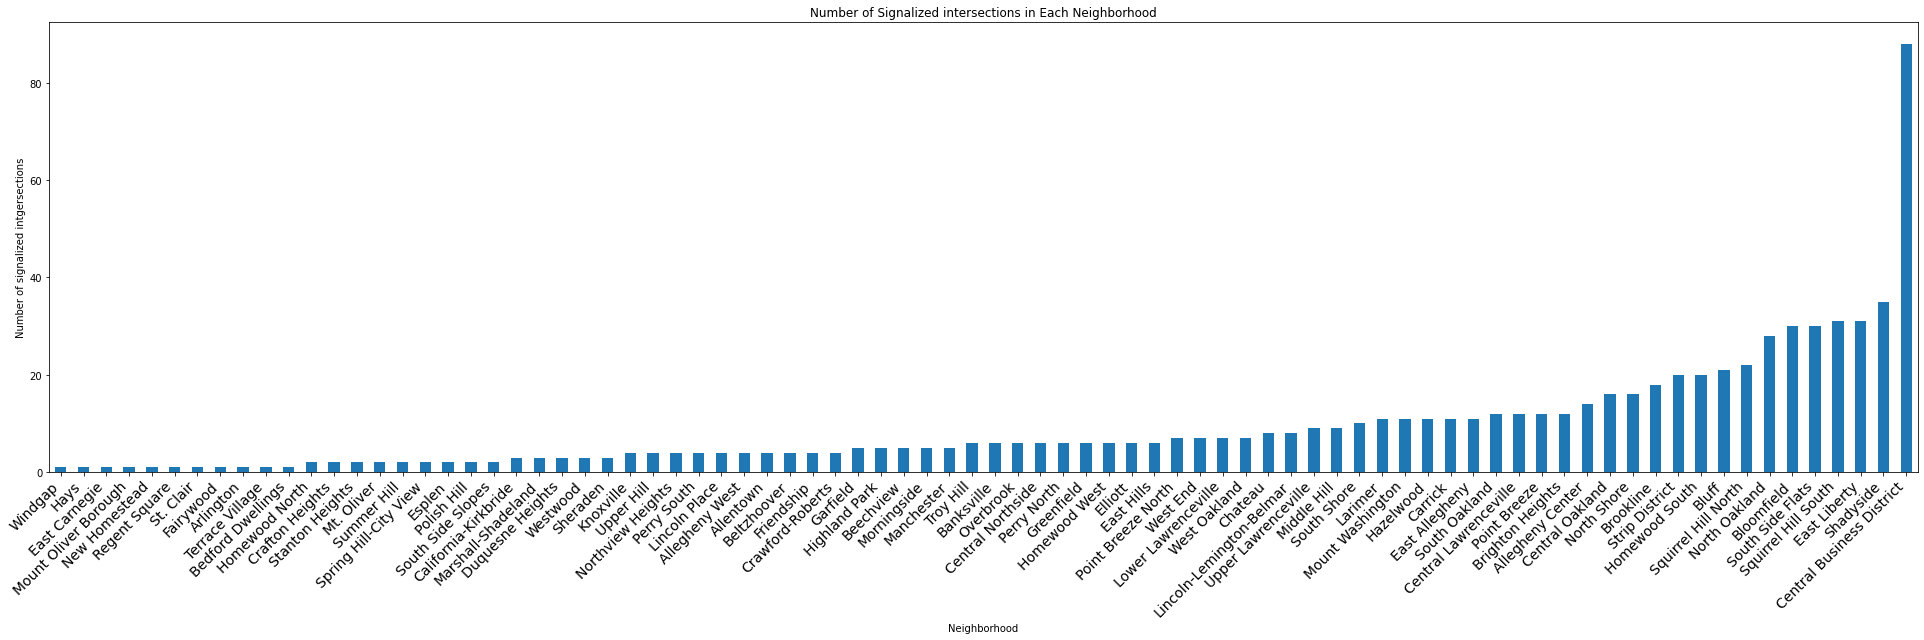

In [8]:

import pandas as pd
import matplotlib.pyplot as plt

signalData=pd.read_csv("intersections.csv", index_col="neighborhood")
neighborhoodCount=signalData.groupby('neighborhood').size()
neighborhoodCount_sort=neighborhoodCount.sort_values()

plt.figure(figsize=(27,9))
neighborhoodCount_sort.plot(kind='bar')
plt.title('Number of Signalized intersections in Each Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Number of signalized intgersections')
plt.xticks(rotation=45, fontsize=14, ha='right')  # Adjust fontsize and alignment
plt.tight_layout()
plt.show()

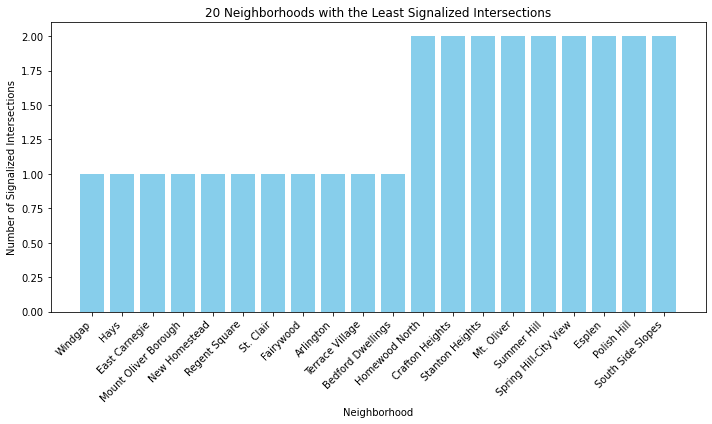

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from csv
signalData = pd.read_csv("intersections.csv")
neighborhoodCount = signalData.groupby('neighborhood').size().reset_index(name='Signalized_Intersections')

# Sort by Signalized_Intersections in ascending order
df_sorted = neighborhoodCount.sort_values(by='Signalized_Intersections', ascending=True)

# Take the top 20 neighborhoods with the least signalized intersections
bottom_5_neighborhoods = df_sorted.head(20)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(bottom_5_neighborhoods['neighborhood'], bottom_5_neighborhoods['Signalized_Intersections'], color='skyblue')
plt.title('20 Neighborhoods with the Least Signalized Intersections')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Signalized Intersections')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


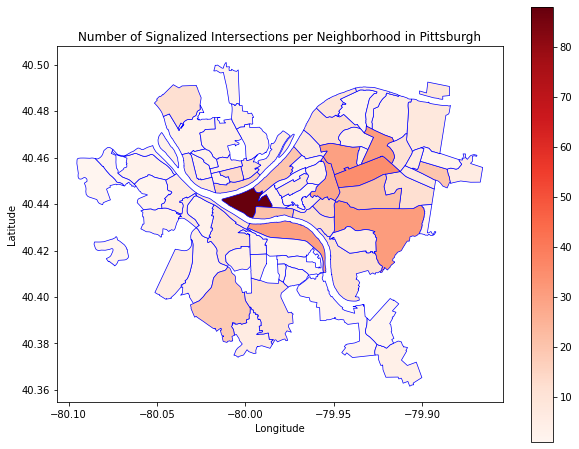

In [10]:

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Read neighborhood boundaries GeoJSON file
neighborhoods = gpd.read_file('pittsburgh.geojson')

# Read traffic lights data CSV file
traffic_lights = pd.read_csv('intersections.csv')

# Count traffic lights in each neighborhood
lights_per_neighborhood = traffic_lights.groupby('neighborhood').size().reset_index(name='light_count')

# Merge neighborhood boundaries with traffic lights count
neighborhoods_with_lights = neighborhoods.merge(lights_per_neighborhood,left_on='name', right_on='neighborhood',how='left')

# Plot choropleth map
fig, ax = plt.subplots(figsize=(10, 8))
neighborhoods_with_lights.plot(ax=ax, column='light_count', cmap='Reds', edgecolor='blue', linewidth=0.7, legend=True)
ax.set_title('Number of Signalized Intersections per Neighborhood in Pittsburgh')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()


## Conlusion

In regards to this particular metric, there isn't one neighborhood that holds absolute advantage. Rather there are are a number neighborhoods that must be looked at in conjuction with the other submetrics to truly assert which one is best. As a sidebar, all of the lights on the bottom 20 list were fixed so fixed vs actuated and semi-actuated lights did not come into play.